# Exploratory data dnlysis 

This includes overviews of:<br />
    -   Features in input dataframes<br />
    -   Missing values<br />
    -   Data types<br /> 
    -   Correlation between numerical features<br />
    -   Distribution of categorical features<br />
    <br />
Input data: Airbnb data of Mallorca acquired on Jun 28th 2020 (http://insideairbnb.com/get-the-data.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Overview of features

In [2]:
# Get an overview of the features in the three input dataframes
calendar.head()
reviews.head()
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11547,https://www.airbnb.com/rooms/11547,20200625202731,2020-06-26,My home at the beach,"Sun, joy, relax, quality, beach & peace. If yo...",It´s a nice refurnished apartment with 50 sq....,"Sun, joy, relax, quality, beach & peace. If yo...",none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.93
1,69998,https://www.airbnb.com/rooms/69998,20200625202731,2020-06-25,COZY HIDEAWAY LOFT... MI AMOR...,Perfect place to escape for a few days of peac...,Cozy loft... mediterranean essence hideaway is...,Perfect place to escape for a few days of peac...,none,( soho-chic bohemian neighborhood of the city ...,...,t,f,strict_14_with_grace_period,t,t,2,2,0,0,1.57
2,100831,https://www.airbnb.com/rooms/100831,20200625202731,2020-06-26,HOUSE IN MALLORCA - WiFi(ET-3045),NaN,House situated in a quiet area of Ca'n Picafor...,House situated in a quiet area of Ca'n Picafor...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.15
3,105891,https://www.airbnb.com/rooms/105891,20200625202731,2020-06-26,VILLAGE HOUSE WITH POOL: IDEAL FOR FAMILIES,The house is a street on the outskirts of the ...,"House, ground floor, situated in a small town ...",The house is a street on the outskirts of the ...,none,The village's population does not reach two th...,...,t,f,strict_14_with_grace_period,f,t,2,2,0,0,0.14
4,106833,https://www.airbnb.com/rooms/106833,20200625202731,2020-06-26,Villa with a big pool in Mallorca,NaN,This is a restored old building situated in th...,This is a restored old building situated in th...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.09


## Overview of missing values

In [183]:
# Function to plot the percentage of missing values
def visualize_percentage_of_missing_values(df, missing_value_threshold=.75):
    '''
    INPUT
    df - pandas dataframe
    missing_value_threshold - the threshold, above which dropping the feature is recommended

    OUTPUT
    plot - A plot of the % of missing values for each feature
    features_to_drop - the features with more missing values than the missing_value_threshold
    '''
    plt.figure()
    (df.isna().sum()/df.shape[0]).plot(kind='bar')
    plt.ylabel('% of missing values')
    plt.gca().set_ylim([0,1])
    plt.yticks(np.array([0,.2,.4,.6,.8,1]),np.array([0,.2,.4,.6,.8,1])*100)
    plt.tight_layout()
    features_to_drop = df.columns[np.where(df.isna().sum()/df.shape[0]>missing_value_threshold)[0]]
    print('Consider dropping features:')
    print(features_to_drop)
    return features_to_drop

Consider dropping features:
Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_neighbourhood',
       'neighbourhood', 'neighbourhood_group_cleansed', 'square_feet',
       'weekly_price', 'monthly_price', 'jurisdiction_names'],
      dtype='object')


Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_neighbourhood',
       'neighbourhood', 'neighbourhood_group_cleansed', 'square_feet',
       'weekly_price', 'monthly_price', 'jurisdiction_names'],
      dtype='object')

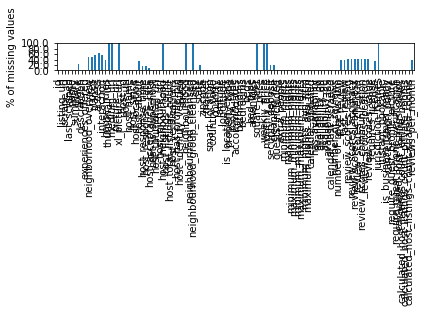

In [184]:
# visualize missing values for listings
visualize_percentage_of_missing_values(listings)

Consider dropping features:
Index([], dtype='object')


Index([], dtype='object')

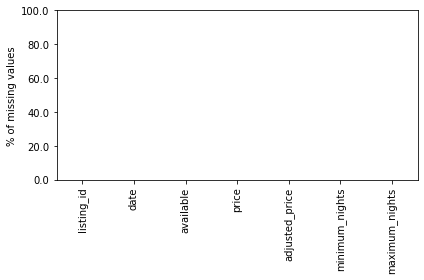

In [185]:
# visualize missing values for calendar
visualize_percentage_of_missing_values(calendar)

Consider dropping features:
Index([], dtype='object')


Index([], dtype='object')

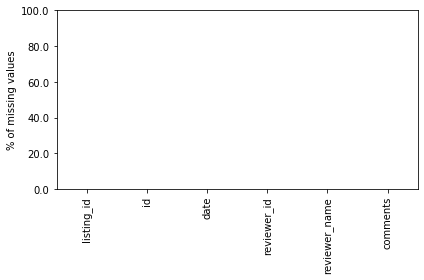

In [186]:
# visualize missing values for reviews
visualize_percentage_of_missing_values(reviews)

## Overview of data types

In [7]:
listings.dtypes.value_counts()

object     61
float64    24
int64      21
dtype: int64

In [9]:
calendar.dtypes.value_counts()

object     4
float64    2
int64      1
dtype: int64

In [12]:
reviews.dtypes.value_counts()

object    3
int64     3
dtype: int64

## Overview of correlation between numerical data

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_group_cleansed,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.778200e+04,1.778200e+04,0.0,0.0,0.0,1.778200e+04,17780.000000,17780.000000,0.0,0.0,...,10437.000000,10439.000000,10439.000000,10436.000000,0.0,17782.000000,17782.000000,17782.000000,17782.000000,10662.000000
mean,2.502889e+07,2.020063e+13,NaN,NaN,NaN,9.708914e+07,139.037852,139.037852,NaN,NaN,...,9.676248,9.635885,9.468915,9.185703,NaN,98.123271,97.184063,0.829547,0.004555,0.538104
std,1.236641e+07,5.117331e-01,NaN,NaN,NaN,8.997484e+07,263.004856,263.004856,NaN,NaN,...,0.820927,0.871676,0.826815,0.996405,NaN,213.183377,211.939044,2.697216,0.100790,0.704584
min,1.154700e+04,2.020063e+13,NaN,NaN,NaN,4.294200e+04,0.000000,0.000000,NaN,NaN,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.621157e+07,2.020063e+13,NaN,NaN,NaN,1.892668e+07,2.000000,2.000000,NaN,NaN,...,10.000000,10.000000,9.000000,9.000000,NaN,2.000000,1.000000,0.000000,0.000000,0.120000
50%,2.446260e+07,2.020063e+13,NaN,NaN,NaN,8.063381e+07,17.000000,17.000000,NaN,NaN,...,10.000000,10.000000,10.000000,9.000000,NaN,15.000000,13.000000,0.000000,0.000000,0.280000
75%,3.570147e+07,2.020063e+13,NaN,NaN,NaN,1.493637e+08,137.000000,137.000000,NaN,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,92.000000,92.000000,0.000000,0.000000,0.670000
max,4.393844e+07,2.020063e+13,NaN,NaN,NaN,3.517754e+08,1337.000000,1337.000000,NaN,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,937.000000,930.000000,40.000000,4.000000,7.020000


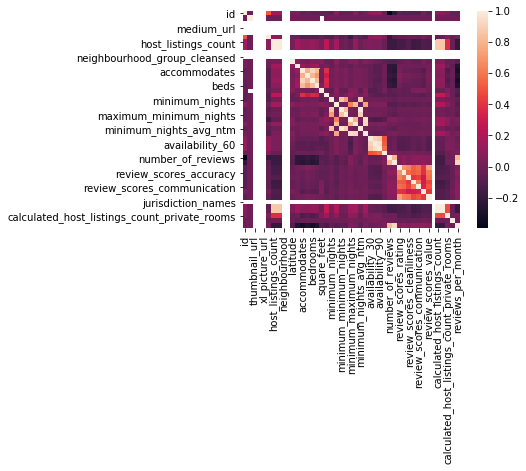

In [18]:
# Numerical entries and their correlations in listings
sns.heatmap(listings.corr(), annot=False, square=True, fmt=".2f")
listings.describe()

,listing_id,minimum_nights,maximum_nights
count,6.490459e+06,6.490437e+06,6.490437e+06
mean,2.502889e+07,5.115732e+00,8.727315e+02
std,1.236607e+07,1.348100e+01,4.515783e+02
min,1.154700e+04,1.000000e+00,1.000000e+00
25%,1.621156e+07,3.000000e+00,1.124000e+03
50%,2.446252e+07,5.000000e+00,1.125000e+03
75%,3.570174e+07,7.000000e+00,1.125000e+03
max,4.393844e+07,1.124000e+03,3.500000e+03


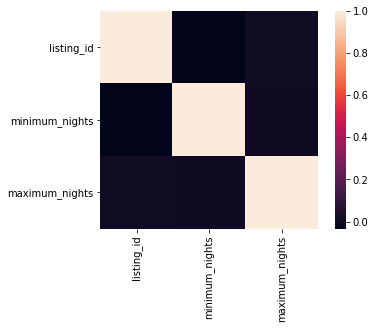

In [20]:
# Numerical entries and their correlations in calendar
sns.heatmap(calendar.corr(), annot=False, square=True, fmt=".2f")
calendar.describe()

## Overview of the distribution of catagorical features

In [26]:
# function to plot the distribution of catagorical features
def plot_distribution_of_categorical_feature(df,feature_name):
    plt.figure(figsize=(12,2))
    df[feature_name].value_counts().plot(kind = 'bar')
    plt.title(feature_name)
    plt.tight_layout()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  


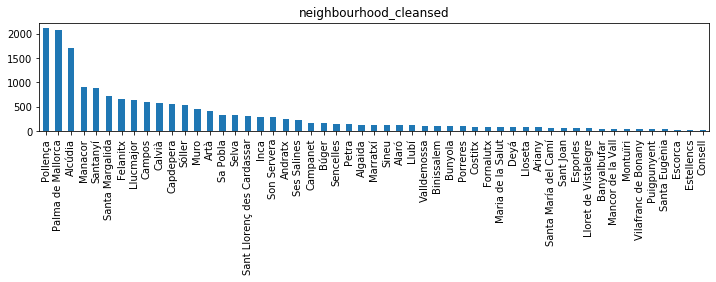

In [27]:
"""Identify the spatial distribution of Airbnb Apartments in Seattle"""
plot_distribution_of_categorical_feature(listings,feature_name='neighbourhood_cleansed')

In [150]:
str('0724700')[str('0724700').find('7'):(str('0724700').find('7')+4)]

'7247'

In [169]:
# numerize zipcode
zipcode_in_num = []
for i in range(listings.shape[0]):
    if str(listings.zipcode[i]).find('7')<0:
        zipcode_in_num.append(np.nan)
    else:
        zipcode_str = str(listings.zipcode[i])
        zipcode_in_num.append(int(zipcode_str[zipcode_str.find('7'):(zipcode_str.find('7')+4)]))
listings.zipcode = np.asarray(zipcode_in_num)

In [170]:
listings.zipcode

0        7183.0
1        7001.0
2        7458.0
3        7519.0
4        7530.0
          ...  
17777    7360.0
17778    7012.0
17779    7660.0
17780    7590.0
17781    7458.0
Name: zipcode, Length: 17782, dtype: float64